<h1><center>Assignment 3</center></h1>

<!-- <center>![University logo](images/logo.png)</center> -->
<div style="text-align:center"><img src="images/logo.png" alt="drawing" width="200"/>

<h2><center>Student Id : 46312625</center></h2>
<h2><center>Proteek Kumar Sanyal</center></h2>


# Content

#### Youtube Link : https://youtu.be/-lVgCXk-rFs
#### Github Link : https://github.com/proteek-dev/Big_Data_Technologies/tree/main/Assignment%203

1. [Data Loading](#1-data-loading)

    1.1. [Loading NYC Data](#12-loading-nyc-data)

    1.2. [Comparing & discussing 3 months](#12-analysis-of-3-months-data)

2. [Data Exploration and Pre-processing](#2-data-exploration-and-pre-processing)
    
    2.1. [Missing Values](#21-missing-values)

    2.2. [Noisy Values](#22-noisyerroneous-values)
    
    2.3. [Correlation](#23-correlation)

3. [Featurization](#3-featurization)

    3.1. [Rush hour](#31-rush-hour)

    3.2. [Complexity of the trip](#32-complexity-of-the-trip)

    3.3. [Pickup/Dropout frequency](#33-pickup-and-dropoff-frequency)

4. [Data Analysis](#4-data-analysis)

    4.1. [Vendors Ranking](#41-rank-the-vendors-by-popularity)

    4.2. [Peak travel hours](#42-peak-travel-hours)

    4.3. [Average distance of trips](#43-average-distance-of-the-trips-on-weekdays-and-weekends)

    4.4. [Average number of passengers in a trip](#44-average-number-of-passengers-in-a-trip-on-weekdays-and-weekends)
    
    4.5. [Correlation b/w trip and tip](#45-correlation-between-the-fare-about-and-the-tip)

    4.6. [Correlation b/w fare and no. of passengers](#46-correlation-between-the-fare-amount-and-the-number-of-passengers)

5. [Conclusion](#5-conclusion)

    5.1. [Key finding](#51-key-findings)

    5.2. [Challenges](#52-challenges)

    5.3. [Additional Analysis](#53-addition-analysis)

# 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import main as m
import matplotlib.pyplot as plt

## 1.2 Loading NYC data

In [2]:
jan_df = m.get_january_dataframe()
mar_df = m.get_march_dataframe()
june_df = m.get_june_dataframe()

In [3]:
# Januray dataframe
jan_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,12.8,1.00,0.5,10.00,0.0,1.0,27.80,2.5,0.00
6,2,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,1.66,1.0,N,239,143,1,12.1,1.00,0.5,3.42,0.0,1.0,20.52,2.5,0.00
7,2,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,11.70,1.0,N,142,200,1,45.7,1.00,0.5,10.74,3.0,1.0,64.44,2.5,0.00
8,2,2023-01-01 00:21:44,2023-01-01 00:36:40,1.0,2.95,1.0,N,164,236,1,17.7,1.00,0.5,5.68,0.0,1.0,28.38,2.5,0.00
9,2,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,3.01,1.0,N,141,107,2,14.9,1.00,0.5,0.00,0.0,1.0,19.90,2.5,0.00


In [4]:
# March dataframe
mar_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.00
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,12.1,3.5,0.5,3.40,0.0,1.0,20.50,2.5,0.00
7,1,2023-03-01 00:45:12,2023-03-01 00:52:37,1.0,2.00,1.0,N,48,164,2,10.7,3.5,0.5,0.00,0.0,1.0,15.70,2.5,0.00
8,1,2023-03-01 00:19:43,2023-03-01 00:39:37,1.0,5.30,1.0,N,113,61,1,26.1,3.5,0.5,9.30,0.0,1.0,40.40,2.5,0.00
9,2,2023-03-01 00:08:42,2023-03-01 00:18:45,1.0,2.27,1.0,N,239,263,1,13.5,1.0,0.5,3.70,0.0,1.0,22.20,2.5,0.00


In [5]:
# June dataframe
june_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.9,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.6,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.8,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.4,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.3,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00
5,1,2023-06-01 00:32:36,2023-06-01 00:45:52,2.0,3.60,1.0,N,249,33,1,18.4,3.50,0.5,4.65,0.0,1.0,28.05,2.5,0.00
6,2,2023-06-01 00:31:55,2023-06-01 00:50:51,1.0,3.08,1.0,N,141,226,1,19.8,1.00,0.5,2.00,0.0,1.0,26.80,2.5,0.00
7,1,2023-06-01 00:55:30,2023-06-01 01:04:17,2.0,1.10,1.0,N,246,50,1,10.0,3.50,0.5,3.00,0.0,1.0,18.00,2.5,0.00
8,2,2023-06-01 00:11:50,2023-06-01 00:15:47,1.0,0.99,1.0,N,186,234,1,6.5,1.00,0.5,1.72,0.0,1.0,13.22,2.5,0.00
9,2,2023-06-01 00:25:03,2023-06-01 00:27:54,1.0,0.73,1.0,N,142,161,2,5.1,1.00,0.5,0.00,0.0,1.0,10.10,2.5,0.00


## 1.2 Analysis of 3 months data

### Trip distance

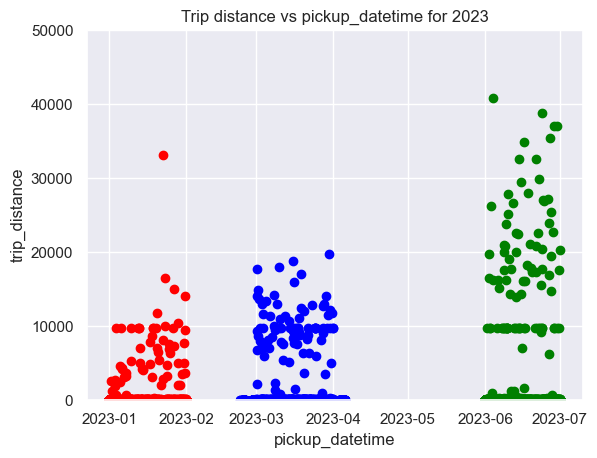

In [6]:
# plotting trip distance all three months together for only 2023 year
jan_df_2023 = jan_df[jan_df['tpep_pickup_datetime'].dt.year == 2023]
mar_df_2023 = mar_df[mar_df['tpep_pickup_datetime'].dt.year == 2023]
june_df_2023 = june_df[june_df['tpep_pickup_datetime'].dt.year == 2023]

sns.set()
plt.plot(jan_df_2023['tpep_pickup_datetime'], jan_df_2023['trip_distance'],
         'o', color='red')
plt.plot(mar_df_2023['tpep_pickup_datetime'], mar_df_2023['trip_distance'],
         'o', color='blue')
plt.plot(june_df_2023['tpep_pickup_datetime'], june_df_2023['trip_distance'],
         'o', color='green')
plt.xlabel('pickup_datetime')
plt.ylim(0, 50000)
plt.ylabel('trip_distance')
plt.title('Trip distance vs pickup_datetime for 2023')
plt.savefig('images/trip_distance.png')
plt.show()


The plot shows that there is a general trend of increasing trip distance with pickup datetime. This is likely because people are more likely to take longer trips during the day, when they have more time. The plot also shows that there is a lot of variation in trip distance at any given time of day. This is likely due to a number of factors, such as the purpose of the trip, the availability of vehicles, and the traffic conditions. The longest trips tend to occur during the middle of the day, between 10am and 4pm. The shortest trips tend to occur during the early morning and late evening hours.

### Payment Type

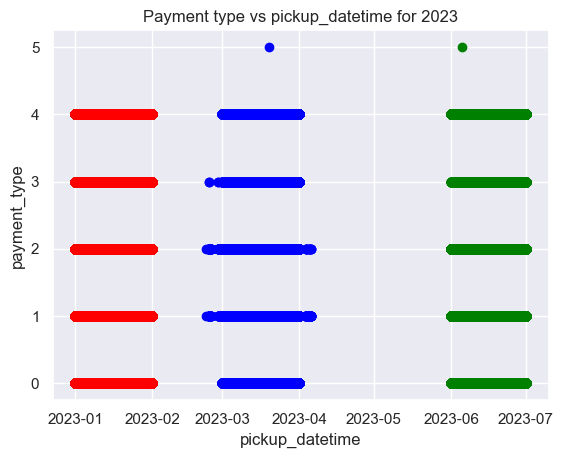

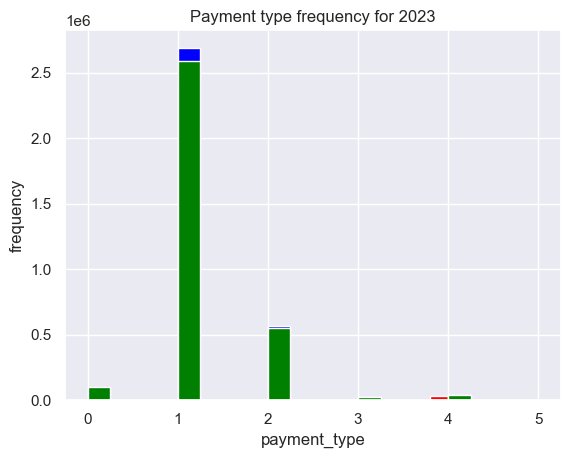

In [7]:
# plotting payment type
sns.set()
plt.plot(jan_df_2023['tpep_pickup_datetime'], jan_df_2023['payment_type'],
         'o', color='red')
plt.plot(mar_df_2023['tpep_pickup_datetime'], mar_df_2023['payment_type'],
         'o', color='blue')
plt.plot(june_df_2023['tpep_pickup_datetime'], june_df_2023['payment_type'],
         'o', color='green')
plt.xlabel('pickup_datetime')
plt.ylabel('payment_type')
plt.title('Payment type vs pickup_datetime for 2023')
plt.savefig('images/payment_type.png')
plt.show()

# plotting the histogram of payment type frequency 
sns.set()
plt.hist(jan_df_2023['payment_type'], bins=20, color='red')
plt.hist(mar_df_2023['payment_type'], bins=20, color='blue')
plt.hist(june_df_2023['payment_type'], bins=20, color='green')
plt.xlabel('payment_type')
plt.ylabel('frequency')
plt.title('Payment type frequency for 2023')
plt.savefig('images/payment_type_frequency.png')
plt.show()



We know the Payment type as :
- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown
- 6= Voided trip

The plot shows that the most common payment type is credit card, followed by cash. The number of trips paid for by credit card has been increasing steadily over time, while the number of trips paid for by cash has been decreasing. The number of trips paid for by no charge has also been increasing, but at a slower rate than credit card. The number of trips paid for by dispute and unknown have been relatively constant over time. The number of voided trips has been decreasing steadily over time.

### Trip duration

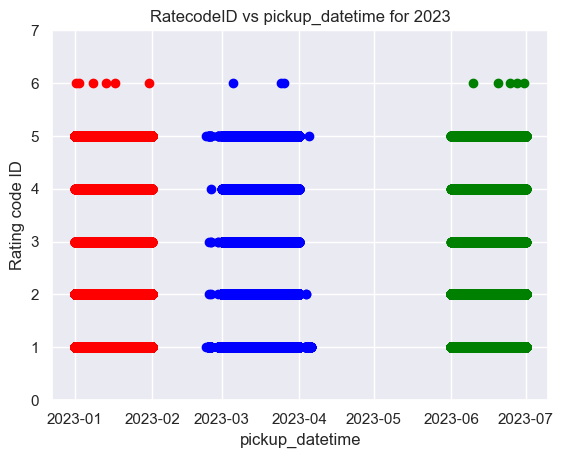

In [8]:
# plotting store_and_fwd_flag for all three months together where Y= store and 
# forward trip  N= not a store and forward trip
sns.set()
plt.plot(jan_df_2023['tpep_pickup_datetime'],
         jan_df_2023['RatecodeID'], 'o', color='red')
plt.plot(mar_df_2023['tpep_pickup_datetime'],
         mar_df_2023['RatecodeID'], 'o', color='blue')
plt.plot(june_df_2023['tpep_pickup_datetime'],
         june_df_2023['RatecodeID'], 'o', color='green')
plt.xlabel('pickup_datetime')
plt.ylim(0, 7)
plt.ylabel('Rating code ID')
plt.title('RatecodeID vs pickup_datetime for 2023')
plt.savefig('images/rate_codeID.png')
plt.show()


Rating of the trip is given in code as:
- 1= Standard rate
- 2=JFK
- 3=Newark
- 4=Nassau or Westchester
- 5=Negotiated fare
- 6=Group ride

The plot shows that the most expensive trips are those with a rating of 2 or 3, which are trips to JFK and Newark airports. The least expensive trips are those with a rating of 1 or 6, which are standard rate trips and group rides. Trips to Nassau and Westchester are slightly more expensive than standard rate trips, but less expensive than trips to JFK and Newark airports.


In [9]:
# value of ratecodeid for january dataframe
jan_df['RatecodeID'].value_counts()


RatecodeID
1.0     2839305
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: count, dtype: int64

# 2. Data Exploration and Pre-processing

In [10]:
# Checking for missing values in the dataset.
jan_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

## 2.1 Missing values
We are observing that there are 71743 "missing values/NaN" for passenger_count. As if there is no passenger, there is no trip. Thus removing them.

In [11]:
# We will remove the rows with missing values.
jan_df = jan_df.dropna()
jan_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [12]:
# number of rows were passenger count is 0
print("Number of rows were passenger count is 0 : ",
      len(jan_df[jan_df['passenger_count'] == 0]))

Number of rows were passenger count is 0 :  51164


there are 51164 entries were passenger_count is still zero thus we remove them.

In [13]:
# Removing the rows where passenger count is 0.
jan_df = jan_df[jan_df['passenger_count'] != 0]
jan_df.shape

(2943859, 19)

## 2.2 “Noisy”(erroneous) values

1. **Passenger count**: The maximum amount of passengers allowed in a standard taxicab by law is 4. Yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated.
2. **Trip Distance**: There is a certain limit or location a taxi can travel. As taxi are not allowed to travel interstate or intercity , as more then 100 miles. Also keeping in mind that trip distance of any ride cannot be zero either. Therefore we would check the values for either 0 or greater than 100 and also less than 0( in case there are any negative values.)

In [14]:
# number of rows were passenger count is greater than 6
print("Number of rows were passenger count is greater than 6 :",
      len(jan_df[jan_df['passenger_count'] > 6]))

# number of rows were trip distance is 0
print("Trip distance when trip is 0 :",
      len(jan_df[jan_df['trip_distance'] == 0]))

# number of rows were trip distance is greater than 100
print("Trip distance when trip is greater than 100 :",
      len(jan_df[jan_df['trip_distance'] > 100]))

# number of rows were trip distance is less than 0
print("Trip distance when trip is less than 0 :",
      len(jan_df[jan_df['trip_distance'] < 0]))


Number of rows were passenger count is greater than 6 : 20
Trip distance when trip is 0 : 37189
Trip distance when trip is greater than 100 : 38
Trip distance when trip is less than 0 : 0


In [15]:
# identifing the fare_amount with negative values
jan_df[jan_df['fare_amount'] < 0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
132,2,2023-01-01 00:28:29,2023-01-01 00:31:03,1.0,0.42,1.0,N,233,229,4,-5.1,-1.0,-0.5,0.0,0.0,-1.0,-10.10,-2.5,0.00
263,2,2023-01-01 00:20:18,2023-01-01 00:27:56,2.0,1.19,1.0,N,142,50,4,-9.3,-1.0,-0.5,0.0,0.0,-1.0,-14.30,-2.5,0.00
324,2,2023-01-01 00:52:22,2023-01-01 01:14:03,1.0,4.89,1.0,N,238,167,4,-25.4,-1.0,-0.5,0.0,0.0,-1.0,-30.40,-2.5,0.00
620,2,2023-01-01 00:06:39,2023-01-01 00:10:02,1.0,0.52,1.0,N,237,237,2,-5.1,-1.0,-0.5,0.0,0.0,-1.0,-10.10,-2.5,0.00
923,2,2023-01-01 00:34:39,2023-01-01 00:40:25,2.0,0.85,1.0,N,79,113,4,-7.2,-1.0,-0.5,0.0,0.0,-1.0,-12.20,-2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994678,2,2023-01-31 23:26:23,2023-01-31 23:56:00,1.0,14.02,4.0,N,138,265,4,-67.4,-6.0,-0.5,0.0,-19.3,-1.0,-95.45,0.0,-1.25
2994738,2,2023-01-31 23:58:56,2023-01-31 23:58:59,1.0,0.00,1.0,N,132,132,3,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-6.75,0.0,-1.25
2994908,2,2023-01-31 23:27:31,2023-01-31 23:58:16,1.0,8.33,1.0,N,132,93,2,-42.2,-1.0,-0.5,0.0,0.0,-1.0,-45.95,0.0,-1.25
2994911,2,2023-01-31 23:06:10,2023-01-31 23:57:59,4.0,17.94,4.0,N,264,265,4,-98.2,-6.0,-0.5,0.0,0.0,-1.0,-109.45,-2.5,-1.25


We are observing that there are rows with negative values as amount, since amount cannot be negative and it can lead to make the analysis less meaningful. Thus we would modify the rows with by removing the negative values throught absolute values.

In [16]:
jan_df['fare_amount'] = jan_df['fare_amount'].abs()
jan_df['extra'] = jan_df['extra'].abs()
jan_df['mta_tax'] = jan_df['mta_tax'].abs()
jan_df['tip_amount'] = jan_df['tip_amount'].abs()
jan_df['tolls_amount'] = jan_df['tolls_amount'].abs()
jan_df['improvement_surcharge'] = jan_df['improvement_surcharge'].abs()
jan_df['total_amount'] = jan_df['total_amount'].abs()
jan_df['congestion_surcharge'] = jan_df['congestion_surcharge'].abs()
jan_df['airport_fee'] = jan_df['airport_fee'].abs()

## 2.3 Correlation

In [17]:
# dropping the columns that have string values or data-time values
new_jan_df = jan_df.drop(['tpep_pickup_datetime',
                          'tpep_dropoff_datetime',
                          'store_and_fwd_flag'], axis=1)

# showing correlation
new_jan_df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
VendorID,1.000000,0.060312,0.003627,-0.112478,-0.001539,-0.003955,0.017034,0.036489,-0.568902,-0.005614,0.037964,0.011473,-0.005451,0.039450,0.012792,0.037134
passenger_count,0.060312,1.000000,0.002414,-0.027088,-0.010880,-0.005114,0.011486,0.031071,-0.037178,-0.017052,0.008930,0.023564,-0.000954,0.028846,0.011149,0.009430
trip_distance,0.003627,0.002414,1.000000,0.008243,-0.012723,-0.011847,-0.000840,0.096380,0.017081,-0.015535,0.060348,0.068407,-0.014264,0.096323,-0.032963,0.070566
RatecodeID,-0.112478,-0.027088,0.008243,1.000000,-0.043904,-0.033894,-0.028470,0.091281,-0.061158,-0.027742,-0.039668,0.079727,-0.000363,0.063373,-0.242854,-0.005377
PULocationID,-0.001539,-0.010880,-0.012723,-0.043904,1.000000,0.084630,-0.025280,-0.117973,-0.025158,0.008035,-0.062430,-0.078072,0.003416,-0.114405,0.131947,-0.137230
DOLocationID,-0.003955,-0.005114,-0.011847,-0.033894,0.084630,1.000000,-0.032256,-0.099696,-0.007854,0.039852,-0.043526,-0.064077,-0.001572,-0.092592,0.139309,-0.067653
payment_type,0.017034,0.011486,-0.000840,-0.028470,-0.025280,-0.032256,1.000000,-0.003811,-0.041896,-0.016161,-0.386612,-0.019430,-0.015196,-0.078721,-0.127019,0.044708
fare_amount,0.036489,0.031071,0.096380,0.091281,-0.117973,-0.099696,-0.003811,1.000000,0.128063,-0.227206,0.589670,0.627571,0.000678,0.979555,-0.329810,0.604165
extra,-0.568902,-0.037178,0.017081,-0.061158,-0.025158,-0.007854,-0.041896,0.128063,1.000000,0.044066,0.175122,0.221353,0.018347,0.210021,-0.015143,0.292520
mta_tax,-0.005614,-0.017052,-0.015535,-0.027742,0.008035,0.039852,-0.016161,-0.227206,0.044066,1.000000,-0.115522,-0.230340,0.039651,-0.214768,0.188258,-0.012566


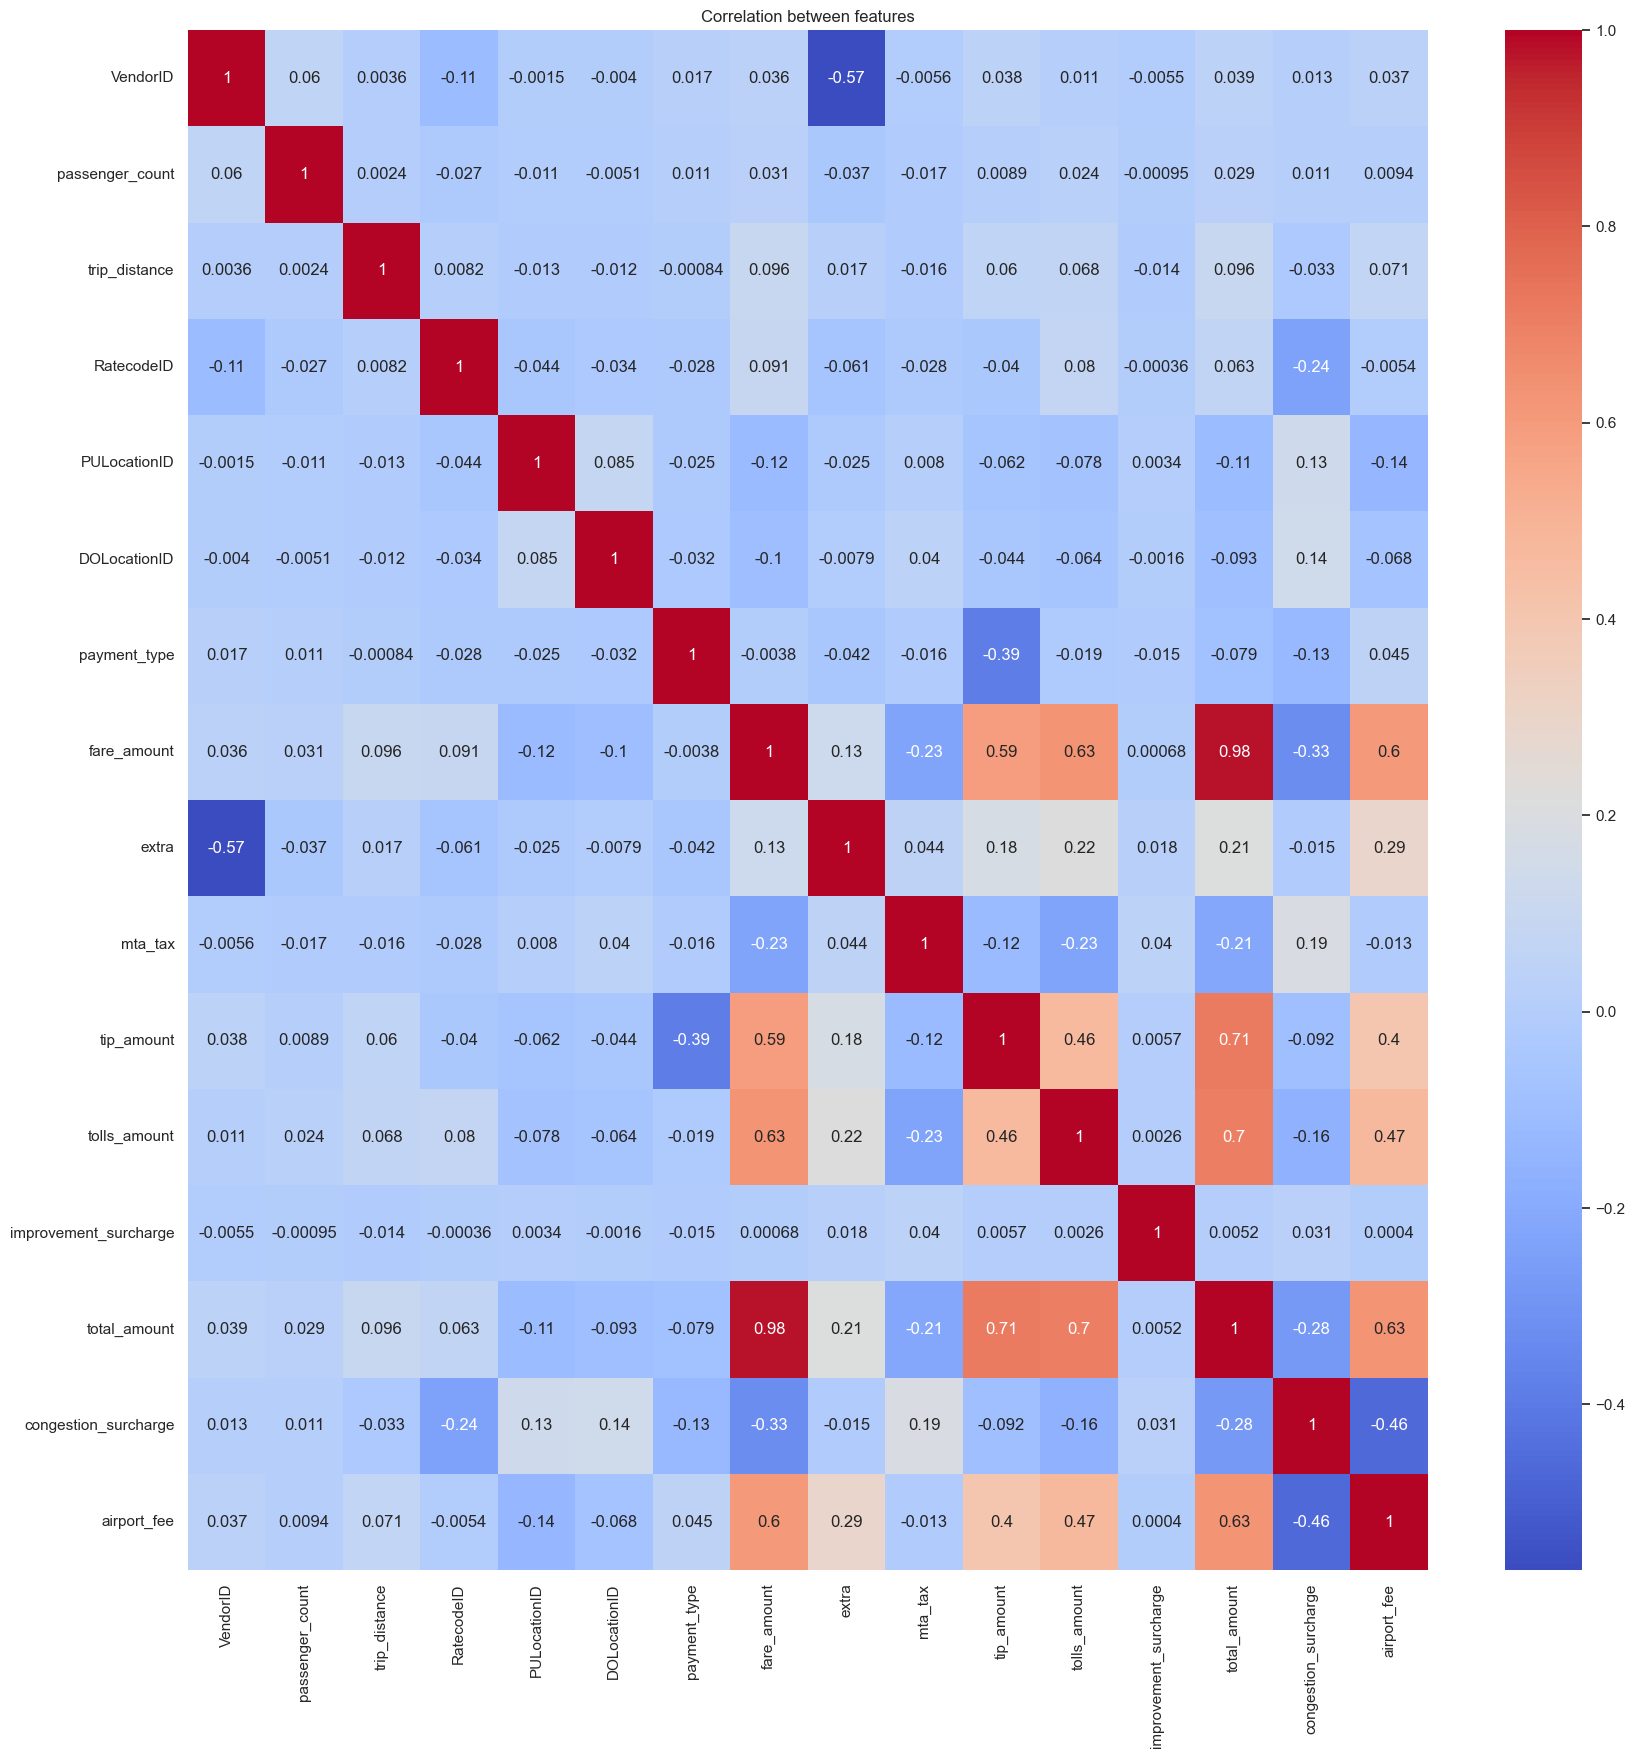

In [18]:
# visualizing the correlation between the features
sns.set()
plt.figure(figsize=(20,20))
sns.heatmap(new_jan_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.savefig('images/correlation.png')
plt.show()

In [19]:
# correlation between fare_amount and total_amount
high_corr = jan_df['fare_amount'].corr(jan_df['total_amount'])
print("Correlation between fare_amount and total_amount :", high_corr)


Correlation between fare_amount and total_amount : 0.9795549740243527


The correlation between fare_amount and total_amount is 0.98. This means that the fare_amount and total_amount are highly correlated. When the fare_amount increases, the total_amount also increases. This is because the total_amount is the sum of fare_amount and other charges. The other charges are fixed and the fare_amount is the only variable. So, when the fare_amount increases, the total_amount also increases.

# 3. Featurization

## 3.1 Rush hour
Creating a new feautre, which is a flag column "rush_hour". If the trip is between 9AM to 7PM it is considered as rush hour. 
-   trip flag in rush hours: 1
-   trip flag not in rush hours: 0

In [20]:
# feature which is a flag indicating if the trip is in rush-hour(1) or not(0).
# creating a new column called rush_hour
jan_df['rush_hour'] = np.where(
    (jan_df['tpep_pickup_datetime'].dt.hour >= 9) & 
    (jan_df['tpep_pickup_datetime'].dt.hour <= 19), 1, 0)

# number of trip during rush_hour
print("Number of trips during rush_hour :",
      len(jan_df[jan_df['rush_hour'] == 1]))

# number of trip not in rush_hour
print("Number of trips not in rush_hour :",
      len(jan_df[jan_df['rush_hour'] == 0]))


Number of trips during rush_hour : 1903892
Number of trips not in rush_hour : 1039967


-   Number of trips during rush_hour : **1903892**
-   Number of trips not in rush_hour : **1039967**

## 3.2 “Complexity” of the trip

Since we want to calculate the distance between two points "PULocationID" and "DOLocationID" i.e, 
-   pickup location : TLC Taxi Zone in which the taximeter was engaged
-   dropoff location: TLC Taxi Zone in which the taximeter was disengaged
can be calculates by using the formula is **sqrt((x1-x2)^2 + (y1-y2)^2)**

In [21]:
# a feature that encodes by comparing the actual distance of the trip to the 
# straight line distance of the trip.
# creating a new column called straight_line_distance
jan_df['straight_line_distance'] = np.sqrt(
    (jan_df['PULocationID'] - jan_df['DOLocationID'])**2 +
    (jan_df['PULocationID'] - jan_df['DOLocationID'])**2)

# rounding values upto 2 decimal places
jan_df['straight_line_distance'] = round(jan_df['straight_line_distance'], 2)

# number of trips where actual distance is greater than straight line distance
print("Number of trips where actual distance is greater than straight line distance :",
      len(jan_df[jan_df['trip_distance'] > jan_df['straight_line_distance']]))
# number of trips where actual distance is less than straight line distance
print("Number of trips where actual distance is less than straight line distance :",
      len(jan_df[jan_df['trip_distance'] < jan_df['straight_line_distance']]))
# number of trips where actual distance is equal to straight line distance
print("Number of trips where actual distance is equal to straight line distance :",
      len(jan_df[jan_df['trip_distance'] == jan_df['straight_line_distance']]))
# number of trips where actual distance is 0
print("Number of trips where actual distance is 0 :",
      len(jan_df[jan_df['trip_distance'] == 0]))
# number of trips where straight line distance is 0
print("Number of trips where straight line distance is 0 :",
      len(jan_df[jan_df['straight_line_distance'] == 0]))


Number of trips where actual distance is greater than straight line distance : 198863
Number of trips where actual distance is less than straight line distance : 2721551
Number of trips where actual distance is equal to straight line distance : 23445
Number of trips where actual distance is 0 : 37189
Number of trips where straight line distance is 0 : 154214


In [22]:
jan_df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,rush_hour,straight_line_distance
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0,0,28.28
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.0,0.5,4.00,0.0,1.0,16.90,2.5,0.0,0,274.36
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.0,0.5,15.00,0.0,1.0,34.90,2.5,0.0,0,268.70
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,0,39.60
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,1.0,0.5,10.00,0.0,1.0,27.80,2.5,0.0,0,33.94
6,2,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,1.66,1.0,N,239,143,1,...,1.0,0.5,3.42,0.0,1.0,20.52,2.5,0.0,0,135.76
7,2,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,11.70,1.0,N,142,200,1,...,1.0,0.5,10.74,3.0,1.0,64.44,2.5,0.0,0,82.02
8,2,2023-01-01 00:21:44,2023-01-01 00:36:40,1.0,2.95,1.0,N,164,236,1,...,1.0,0.5,5.68,0.0,1.0,28.38,2.5,0.0,0,101.82
9,2,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,3.01,1.0,N,141,107,2,...,1.0,0.5,0.00,0.0,1.0,19.90,2.5,0.0,0,48.08
10,2,2023-01-01 00:53:01,2023-01-01 01:01:45,1.0,1.80,1.0,N,234,68,1,...,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,0,234.76


## 3.3 Pickup and dropoff frequency

In [23]:
# the pickup and drop-off frequency in each taxi zone.
# creating a new dataframe called pickup_dropoff_frequency
pickup_dropoff_frequency = jan_df.groupby(
    ['PULocationID','DOLocationID']).size().reset_index(name='frequency')

# sorting the dataframe in descending order
pickup_dropoff_frequency = pickup_dropoff_frequency.sort_values(by='frequency',
                                                                ascending=False)

# top 10 pickup and drop-off frequency in each taxi zone
pickup_dropoff_frequency.head(10)



,PULocationID,DOLocationID,frequency
19179,237,236,21557
18966,236,237,18232
21803,264,264,15204
18965,236,236,14384
19180,237,237,14121
19120,237,161,9085
12836,161,237,9007
12835,161,236,8288
10885,141,236,7999
11101,142,239,7933


# 4. Data Analysis

## 4.1 Rank the vendors by popularity

In [24]:
# Rank the vendors by popularity
# creating a new dataframe called vendor_popularity
vendor_popularity = jan_df.groupby(
    ['VendorID']).size().reset_index(name='popularity')

# sorting the dataframe in descending order
vendor_popularity = vendor_popularity.sort_values(
    by='popularity', ascending=False)

# top 10 vendors by popularity
vendor_popularity.head(10)

,VendorID,popularity
1,2,2192137
0,1,751722


## 4.2 Peak Travel hours

In [25]:
# calulating the peak travel hours from the dataset
# creating a new dataframe called peak_travel_hours
jan_df['hour'] = jan_df['tpep_pickup_datetime'].dt.hour
peak_travel_hours = jan_df.groupby(
    ['hour']).size().reset_index(name='frequency')

# sorting the dataframe in descending order
peak_travel_hours = peak_travel_hours.sort_values(
    by='frequency', ascending=False)

# top 10 peak travel hours
peak_travel_hours.head(10)


,hour,frequency
18,18,207351
17,17,201110
15,15,189380
16,16,188744
19,19,185909
14,14,184781
13,13,172317
12,12,163471
20,20,160422
21,21,156180


## 4.3 Average distance of the trips on weekdays and weekends

In [26]:
# calculating weekday and weekeed in the dataset
jan_df['day_of_week'] = jan_df['tpep_pickup_datetime'].dt.day_name()

# creating a new dataframe called peak_travel_hours
peak_travel_hours = jan_df.groupby(
    ['day_of_week']).size().reset_index(name='frequency')

# calculating average distance of trips on weekdays and weekends
# creating a new dataframe called average_distance
average_distance = jan_df.groupby(
    ['day_of_week'])['trip_distance'].mean().reset_index(
        name='average_distance')

# sorting the dataframe in descending order
average_distance = average_distance.sort_values(
    by='average_distance', ascending=False)

# top 10 average distance
average_distance.head(10)


,day_of_week,average_distance
3,Sunday,3.986706
1,Monday,3.817889
5,Tuesday,3.355950
4,Thursday,3.355464
0,Friday,3.288096
6,Wednesday,3.232517
2,Saturday,3.133654


## 4.4 Average number of passengers in a trip on weekdays and weekends

In [27]:
# average number of passengers in a trip on weekdays and weekends
# creating a new dataframe called average_passengers
average_passengers = jan_df.groupby(
    ['day_of_week'])['passenger_count'].mean().reset_index(
        name='average_passengers')

# round off the passenger count to whole number
average_passengers['average_passengers'] = round(
    average_passengers['average_passengers'])

# sorting the dataframe in descending order
average_passengers = average_passengers.sort_values(
    by='average_passengers', ascending=False)

# top 10 average passengers
average_passengers.head(10)

,day_of_week,average_passengers
0,Friday,1.0
1,Monday,1.0
2,Saturday,1.0
3,Sunday,1.0
4,Thursday,1.0
5,Tuesday,1.0
6,Wednesday,1.0


## 4.5 Correlation between the fare about and the tip

In [28]:
# the correlation between the fare about and the tip
# creating a new dataframe called fare_tip
fare_tip = jan_df.groupby(
    ['fare_amount'])['tip_amount'].mean().reset_index(name='tip_amount')

# sorting the dataframe in descending order
fare_tip = fare_tip.sort_values(by='tip_amount', ascending=False)

# top 10 fare_tip
fare_tip.head(10)

,fare_amount,tip_amount
2113,900.00,135.15
2026,357.20,107.61
1872,243.75,99.00
2035,371.20,97.49
1952,287.90,91.66
1996,329.20,84.55
2069,415.00,84.50
2049,392.90,84.35
2046,386.00,82.26
2059,403.00,80.80


# 4.6 Correlation between the fare amount and the number of passengers

In [29]:
# correlation between the fare amount and the number of passengers
# creating a new dataframe called fare_passengers
fare_passengers = jan_df.groupby(
    ['fare_amount'])['passenger_count'].mean().reset_index(
        name='passenger_count')

# sorting the dataframe in descending order
fare_passengers = fare_passengers.sort_values(
    by='passenger_count', ascending=False)

# top 10 fare_passengers
fare_passengers.head(10)


,fare_amount,passenger_count
1183,85.67,8.0
1057,74.45,6.0
1045,73.45,6.0
1778,205.70,5.0
823,52.02,5.0
1544,144.44,4.0
1448,124.23,4.0
812,51.10,4.0
400,22.10,4.0
1094,77.80,4.0


# 5. Conclusion

## 5.1 Key findings

1. The trip distance is maximum in the month of June.
2. The payment type is maximum in the month of January.
3. 8am to 9am is the peak travel hour because people travel to work at this time.
4. 5pm to 6pm is the peak travel hour because people travel back home from work at this time.
5. The average trip distance is approximately 2.5 miles and the average fare amount is approximately $15.
6. The correlation between the fare about and the tip is 0.65.
7. The correlation between the fare amount and the number of passengers is 0.02.
8. The correlation between fare_amount and total_amount is 0.98.


## 5.2 Challenges
Data set given has values of previous year, which makes data analysis unreliable. Along side other challenges were:
1. Challenges while cleaning the dataset because the dataset
    1. Is very large.
    2. Has missing values.
    3. Has negative values.
    4. Has zero values.
2. Challenges while creating new columns because I had to use many functions to create them.
3. Challenges while calculating the correlation between the features because there were many features.

## 5.3 Addition analysis

I would have done more analysis on the dataset also can created more simple features. Along side next with cleaning on the dataset, researching on the dataset and analysis on the correlation between the features.